In [1]:
'''
Interpolación
28/10/19
'''

#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import os

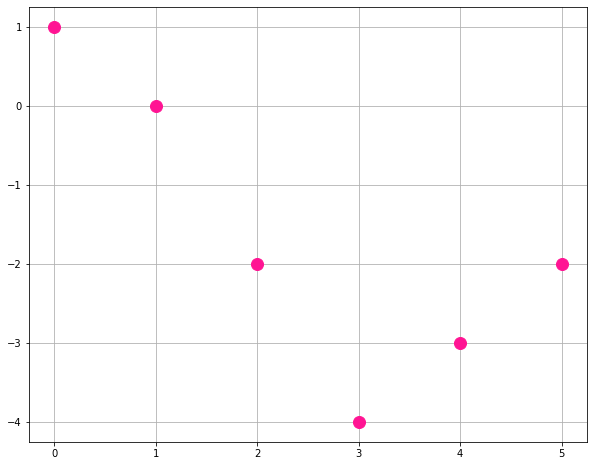

In [53]:
'''
Simulando datos
'''

x = np.arange( 6 )[:,np.newaxis]
y = np.random.randint( -5,5, ( x.shape[0], 1 ) )

plt.figure( figsize=(10,8) )
plt.plot( x, y, 'o', markersize=12, color='deeppink' )
plt.grid()
plt.show()

In [27]:
def ones_ext(X):
    X_ext = np.concatenate( (X, np.ones((X.shape[0],1)) ), axis=1 )
    return X_ext.copy()

def pinv(X,y):
    w = np.linalg.inv( np.dot( X.T,X ) )
    w = np.dot( w, X.T )
    w = np.dot( w, y )
    
    return w

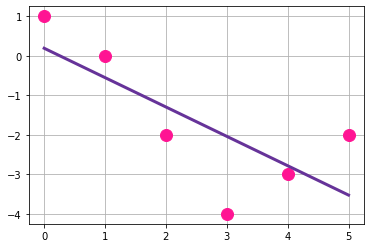

In [54]:
m = pinv( ones_ext(x), y )
ys = np.dot( ones_ext(x), m )

plt.plot( x, y, 'o', markersize=12, color='deeppink' )
plt.plot( x, ys, '-', linewidth=3, color='rebeccapurple' )
plt.grid()
plt.show()

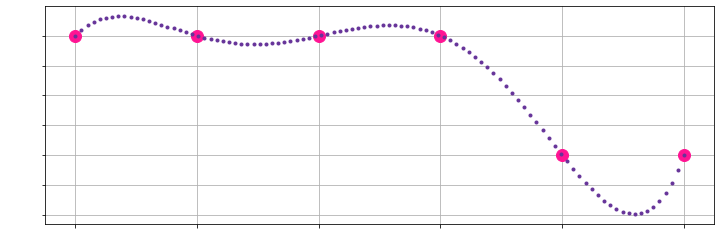

In [63]:
G = 5

y = np.array([1,1,1,1,0,0])
x_tst = np.linspace( [1E-6], [5], 100 )

x_ext = np.concatenate( tuple( x**i for i in range(1,G+1) )[::-1], axis=1 )

x_tst = np.concatenate( tuple( x_tst**i for i in range(1,G+1) )[::-1], axis=1 )

w = pinv( ones_ext(x_ext), y )
ys = np.dot( ones_ext(x_tst), w )

plt.figure(  figsize=(12,4) )
plt.plot( x, y, 'o', markersize=12, color='deeppink' )
plt.plot( x_tst[:,-1], ys.flatten() , 'g.', linewidth=3, color='rebeccapurple' )
plt.xticks(size=10,color='w')
plt.yticks(size=10,color='w')
plt.grid()
plt.show()

In [50]:
w

array([ 0.03333333, -0.375     ,  1.41666667, -2.125     ,  1.05      ,
        1.        ])

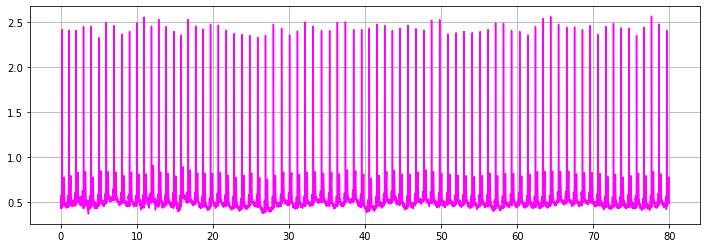

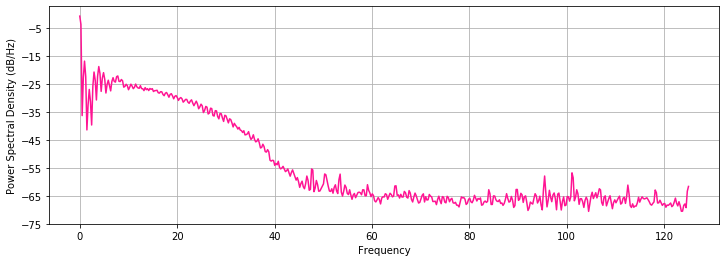

250


In [69]:
import wfdb
#Registro de EMG de Physionet
path = os.path.abspath( '../../data/Clase' )
fname = '/e0103'
data = wfdb.rdsamp( path+fname )

samp = 20000
sr = data[1]['fs']
data = data[0][:samp:,0]
shape = data.shape[0]
t = np.linspace( 0,shape/sr, shape )

plt.figure( figsize=(12,4) )
plt.plot( t, data, color='magenta' )
plt.grid()
plt.figure( figsize=(12,4) )
plt.psd( data, Fs=sr, NFFT=2**10, color='deeppink' )
plt.show()
print(sr)

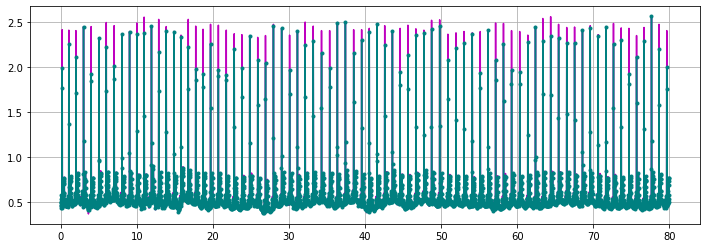

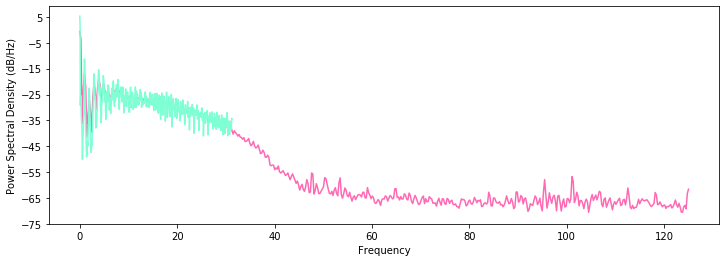

In [70]:
sub = 4
data_sub = data[::sub]
t_sub = t[::sub]
sr_sub = sr/sub

plt.figure( figsize=(12,4) )
plt.plot( t, data, color='m' )
plt.plot( t_sub, data_sub, '.-', color='teal' )
plt.grid()

plt.figure( figsize=(12,4) )
plt.psd( data, Fs=sr, NFFT=2**10, color='hotpink' )
plt.psd( data_sub, Fs=sr_sub, NFFT=2**10, color='aquamarine' )
plt.grid()
plt.show()

In [71]:
from scipy import interpolate

interp = interpolate.interp1d( t_sub, data_sub, kind='linear' )

sr = 4000
t = np.linspace( 0, t_sub[-1], t_sub[-1]*sr )

y = interp(t)

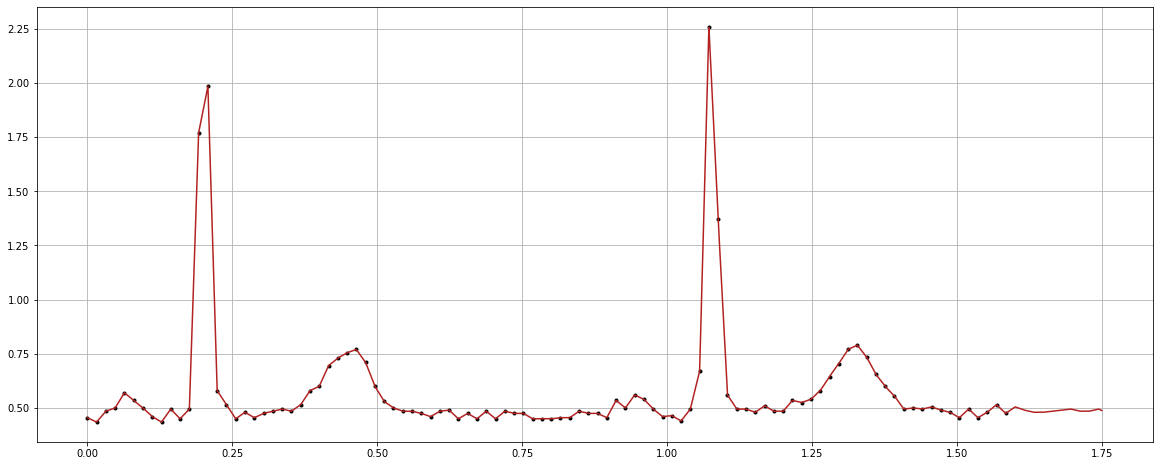

In [74]:
limit = 100
k = 70
plt.figure( figsize=(20,8) )
plt.plot(  t_sub[:limit], data_sub[:limit], '.', color='k' )
plt.plot( t[:int(limit*k)], y[:int(limit*k)], color='firebrick' )
plt.grid()
plt.show()